In [92]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from collections import Counter
from sklearn import utils
import pandas as pd
import math

In [110]:
parkinsons_dataset = pd.read_csv('parkinsons.csv')
parkinsons_dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,Diagnosis
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [111]:
parkinsons_dataset = parkinsons_dataset.sample(frac=1)
parkinsons_dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,Diagnosis
187,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868,0
73,112.014,588.518,107.024,0.00533,0.00005,0.00268,0.00329,0.00805,0.02448,0.226,...,0.04120,0.00623,24.178,0.509127,0.789532,-5.389129,0.306636,1.928708,0.225461,1
121,176.824,215.293,83.961,0.00460,0.00003,0.00209,0.00221,0.00628,0.01169,0.117,...,0.01603,0.01161,27.166,0.400088,0.656182,-4.711007,0.281618,2.655744,0.234809,1
115,151.872,492.892,69.085,0.00856,0.00006,0.00404,0.00385,0.01211,0.01843,0.235,...,0.02389,0.06051,23.693,0.407701,0.662668,-4.673241,0.261549,2.702355,0.274407,1
31,199.228,209.512,192.091,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,0.089,...,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,143.533,162.215,65.809,0.01101,0.00008,0.00647,0.00467,0.01941,0.05384,0.478,...,0.09455,0.04882,20.338,0.513237,0.731444,-5.869750,0.151814,2.118496,0.185580,1
91,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.07959,0.772,...,0.13262,0.01658,19.664,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120,1
184,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.163,...,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404,0
74,110.793,128.101,107.316,0.00494,0.00004,0.00260,0.00283,0.00780,0.02442,0.216,...,0.04295,0.00479,25.438,0.437031,0.815908,-5.313360,0.201861,2.225815,0.244512,1


In [112]:
parkinsons_features = parkinsons_dataset.drop('Diagnosis', axis=1).values
parkinsons_labels = parkinsons_dataset['Diagnosis'].values
parkinsons_features

array([[1.163420e+02, 5.812890e+02, 9.424600e+01, ..., 1.166360e-01,
        2.152083e+00, 1.388680e-01],
       [1.120140e+02, 5.885180e+02, 1.070240e+02, ..., 3.066360e-01,
        1.928708e+00, 2.254610e-01],
       [1.768240e+02, 2.152930e+02, 8.396100e+01, ..., 2.816180e-01,
        2.655744e+00, 2.348090e-01],
       ...,
       [1.168480e+02, 2.175520e+02, 9.950300e+01, ..., 2.067680e-01,
        2.120412e+00, 2.524040e-01],
       [1.107930e+02, 1.281010e+02, 1.073160e+02, ..., 2.018610e-01,
        2.225815e+00, 2.445120e-01],
       [1.107070e+02, 1.226110e+02, 1.050070e+02, ..., 3.150740e-01,
        1.862092e+00, 2.286240e-01]])

In [113]:
def normalize(train, test, epsilon=1e-10):
    min_val = np.min(train, axis=0)
    max_val = np.max(train, axis=0)
    train_norm = (train - min_val) / (max_val - min_val + epsilon)
    test_norm = (test - min_val) / (max_val - min_val + epsilon)
    return train_norm, test_norm

In [114]:
numerical_indices = []
categorical_indices = np.arange(22)
X_numerical = np.array(parkinsons_features[:, numerical_indices], dtype=float)
X_categorical = parkinsons_features[:, categorical_indices]
feature_encoder = OneHotEncoder(sparse=False)
X_categorical_encoded = feature_encoder.fit_transform(X_categorical)
X_numerical_normalized, _ = normalize(X_numerical, X_numerical)
X = np.hstack((X_numerical_normalized, X_categorical_encoded))
label_encoder = OneHotEncoder(sparse=False)
y = label_encoder.fit_transform(parkinsons_labels.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
def stratified_cross_validation(features, labels, k=10):
    label_indices = [np.where(labels == label)[0] for label in np.unique(labels)]
    folds = []
    pairs = []
    shuffled_label_indices = [np.random.permutation(label_list) for label_list in label_indices]
    label_splits = [np.array_split(label_list, k) for label_list in shuffled_label_indices]
    for fold_parts in zip(*label_splits):
        fold = np.concatenate(fold_parts)
        folds.append(fold)
    for fold_index in range(k):
        test_fold = folds[fold_index]
        train_fold = np.concatenate([folds[i] for i in range(k) if i != fold_index])
        pairs.append((train_fold, test_fold))
    return pairs

Question 1. Evaluate the performance of at least two algorithms you studied and/or implemented during the semester (e.g., k-NN, Decision Trees, standard Naive Bayes, Random Forests, Neural Networks, etc).1 You should discuss which algorithms you decided to test on each dataset and why.

# Neural Network Algorithm

Please note that we used Cyril's implementation of NN here.

In [101]:
class NN:
    def __init__(self, sizes, initial_weights=None, eta=0.01, reg_lambda=0.01, use_softmax=False):
        self.sizes = sizes
        self.eta = eta
        self.reg_lambda = reg_lambda
        self.use_softmax = use_softmax
        self.weights = self.init_weights() if initial_weights is None else initial_weights

    def init_weights(self):
        return [np.random.randn(y, x + 1) * 0.1 for x, y in zip(self.sizes[:-1], self.sizes[1:])]

    def add_bias(self, X):
        return np.insert(X, 0, 1, axis=1)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        act = [self.add_bias(X)]
        ll = []
        for index, weight in enumerate(self.weights[:-1]):
            ll.append(act[-1] @ weight.T)
            act.append(self.add_bias(1 / (1 + np.exp(-ll[-1]))))
        ll.append(act[-1] @ self.weights[-1].T)
        act.append(self.softmax(ll[-1]) if self.use_softmax else 1 / (1 + np.exp(-ll[-1])))
        return act, ll

    def cost(self, Y, act):
        xq = Y.shape[0]
        return -np.sum(Y * np.log(act[-1] + 1e-8)) / xq if self.use_softmax else -np.sum(Y * np.log(act[-1]) + (1 - Y) * np.log(1 - act[-1])) / xq

    def backward(self, targets, activations, weights):
        num_samples = targets.shape[0]
        errors = [activations[-1] - targets]
        gradients = []
        for i in range(len(weights) - 1, 0, -1):
            delta = (errors[0] @ weights[i][:, 1:]) * activations[i][:, 1:] * (1 - activations[i][:, 1:])
            errors.insert(0, delta)
        for i in range(len(weights)):
            grad = errors[i].T @ activations[i] / num_samples
            gradients.append(grad)
        return errors, gradients

    def update_weights(self, gradients):
        for i in range(len(self.weights)):
            regularization_grad = (self.reg_lambda * self.weights[i]) / self.weights[i].shape[0]
            regularization_grad[:, 0] = 0
            self.weights[i] -= self.eta * (gradients[i] + regularization_grad)

    def predict(self, inputs):
        final_activations, _ = self.forward(inputs)
        return np.argmax(final_activations[-1], axis=1) + 1

    def train(self, inputs, labels, iterations):
        for _ in range(iterations):
            final_activations, _ = self.forward(inputs)
            _, weight_gradients = self.backward(labels, final_activations, self.weights)
            self.update_weights(weight_gradients)
        return self.weights


In [102]:
def accuracy(Y, predictions):
    true_labels = np.argmax(Y, axis=1) + 1
    accuracy = np.mean(predictions == true_labels)
    return accuracy * 100

def f1_score(Y, predictions):
    true_labels = np.argmax(Y, axis=1) + 1
    classes = np.unique(true_labels)
    f1_scores = []
    for c in classes:
        tp = np.sum((predictions == c) & (true_labels == c))
        fp = np.sum((predictions == c) & (true_labels != c))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        fn = np.sum((predictions != c) & (true_labels == c))
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        f1_scores.append(f1)
    avg_f1 = np.mean(f1_scores) * 100
    return avg_f1

In [105]:
nn = NN([X.shape[1], 600, 2], eta=0.05, reg_lambda=0.01, use_softmax=True)
trained_weights = nn.train(X_train, y_train, iterations=20000)
train_predictions = nn.predict(X_train)
train_accuracy = accuracy(y_train, train_predictions)
train_f1score = f1_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Training F1 Score: {train_f1score:.2f}%")
test_predictions = nn.predict(X_test)
test_accuracy = accuracy(y_test, test_predictions)
test_f1score = f1_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.2f}%")
print(f"Testing F1 Score: {test_f1score:.2f}%")

KeyboardInterrupt: 

In [90]:
def test_hyperparameters(features, labels, k=10):
    eta_values = [0.05, 0.1, 0.2]
    reg_lambda_values = [0.01, 0.05, 0.1]
    layer_configurations = [
        [X.shape[1], 10, 2] ,
        [X.shape[1], 30, 2] ,
        [X.shape[1], 30,10, 2],
        [X.shape[1], 30, 30, 2]
    ]
    results = []
    for eta in eta_values:
        for reg_lambda in reg_lambda_values:
            for layers in layer_configurations:
                train_accuracies = []
                train_f1_scores = []
                test_accuracies = []
                test_f1_scores = []
                splits = stratified_cross_validation(features, labels, k)
                for train_indices, test_indices in splits:
                    X_train, y_train = features[train_indices], labels[train_indices]
                    X_test, y_test = features[test_indices], labels[test_indices]
                    nn = NN(layers, eta=eta, reg_lambda=reg_lambda, use_softmax=True)
                    nn.train(X_train, y_train, iterations=1000)
                    train_predictions = nn.predict(X_train)
                    train_accuracy = accuracy(y_train, train_predictions)
                    train_f1 = f1_score(y_train, train_predictions)
                    test_predictions = nn.predict(X_test)
                    test_accuracy = accuracy(y_test, test_predictions)
                    test_f1 = f1_score(y_test, test_predictions)
                    train_accuracies.append(train_accuracy)
                    train_f1_scores.append(train_f1)
                    test_accuracies.append(test_accuracy)
                    test_f1_scores.append(test_f1)
                results.append({
                    "configuration": layers,
                    "lambda": reg_lambda,
                    "learning_rate": eta,
                    "train_accuracy": np.mean(train_accuracies),
                    "train_f1": np.mean(train_f1_scores),
                    "test_accuracy": np.mean(test_accuracies),
                    "test_f1": np.mean(test_f1_scores)
                })
    return results


In [91]:
results_nn = test_hyperparameters(X, y, k=10)
for result in results_nn:
    print(f"Structure: {result['configuration']}, Lambda: {result['lambda']}, Learning Rate: {result['learning_rate']}, "
          f"Train Acc: {result['train_accuracy']:.2f}, Train F1: {result['train_f1']:.2f}, Test Acc: {result['test_accuracy']:.2f}, "
          f"Test F1: {result['test_f1']:.2f}")

KeyError: "None of [Index([162, 140, 128, 177, 116,  51,  56, 158,  49, 169,\n       ...\n       103, 168, 186, 137,  38, 171, 133, 160, 135, 110],\n      dtype='int64', length=350)] are in the [columns]"

In [13]:
def display_sorted_results(results):
    df = pd.DataFrame(results)
    sort_columns = ['test_accuracy', 'test_f1']
    sorted_df = df.sort_values(by=sort_columns, ascending=[False, False])
    print(sorted_df.to_string(index=False))

display_sorted_results(results_nn)

    configuration  lambda  learning_rate  train_accuracy   train_f1  test_accuracy   test_f1
    [3914, 30, 2]    0.01           0.20      100.000000 100.000000      97.973684 97.286260
    [3914, 30, 2]    0.01           0.10      100.000000 100.000000      97.947368 97.066891
    [3914, 10, 2]    0.01           0.20      100.000000 100.000000      97.921053 96.995686
    [3914, 30, 2]    0.05           0.20      100.000000 100.000000      97.473684 96.412693
    [3914, 10, 2]    0.05           0.20      100.000000 100.000000      97.421053 96.725160
    [3914, 30, 2]    0.05           0.10       99.828896  99.766954      96.921053 95.353580
    [3914, 30, 2]    0.10           0.20      100.000000 100.000000      95.921053 93.784029
    [3914, 10, 2]    0.01           0.10      100.000000 100.000000      95.868421 94.598100
[3914, 30, 30, 2]    0.01           0.20       97.499675  94.166081      93.789474 89.509194
    [3914, 10, 2]    0.05           0.10       99.315747  99.055930   

156


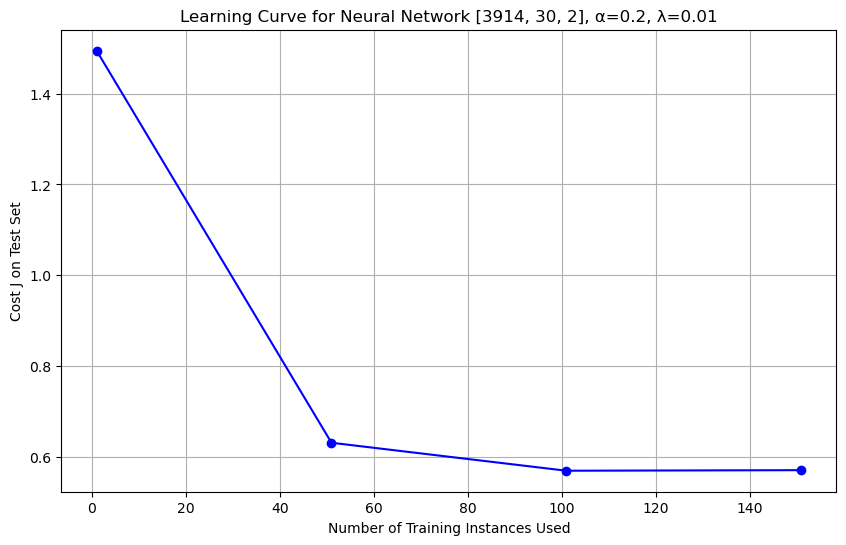

In [108]:
def learning_curve(X_train, y_train, X_test, y_test, nn, increments=50):
    costs = []
    for i in range(1, len(X_train), increments):
        nn.train(X_train[:i], y_train[:i], iterations=1)
        activations, _ = nn.forward(X_test)
        cost = nn.cost(y_test, activations[-1])
        costs.append(cost)
    return costs

np.random.seed(0)
nn = NN([3914, 30, 2], eta=0.2, reg_lambda=0.01, use_softmax=True)
costs = learning_curve(X_train, y_train, X_test, y_test, nn)
plt.figure(figsize=(10, 6))
print(len(X_train))
plt.plot(range(1, len(X_train),50), costs, marker='o', linestyle='-', color='b')
plt.title('Learning Curve for Neural Network [3914, 30, 2], α=0.2, λ=0.01')
plt.xlabel('Number of Training Instances Used')
plt.ylabel('Cost J on Test Set')
plt.grid(True)

# KNN Algorithm

In [116]:
#  there is a warning somewhere and it gets really slow 
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [117]:
# shuffle data 
def shuffle(data): 
    return utils.shuffle(data)

In [118]:
# partition of data
def partition(X,Y): 
    X_training_set, X_test_set, Y_training_set, Y_test_set  = model_selection.train_test_split(X,Y, test_size = 0.20)
    return X_training_set, X_test_set, Y_training_set, Y_test_set

In [119]:
#normalization of training data 
def normalize(X_training_set):
    return  (X_training_set - X_training_set.min()) / (X_training_set.max() - X_training_set.min())

In [120]:
# Euclidean Distance function 
def euclidean_dist(train_pt, test_pt): 
    return np.sqrt(np.sum((train_pt - test_pt) ** 2))

In [121]:
#nearest neighbor function 
def get_neighbors(X_train_dataset, x_test_pt, Y_train_dataset,k):
    #print("got here 3")
    distances = [euclidean_dist(train_pt, x_test_pt) for train_pt in X_train_dataset.values]
    index = np.argsort(distances)[:k]
    #print("got here 4")
    #print(index)
    #print( Y_train_dataset.iloc[index])
    return Y_train_dataset.iloc[index]

In [122]:
# knn algorithm 
def knn(X_train_dataset, X_test_dataset, Y_train_dataset,k):
    y_pred = []
    #print("got here 2")
    for x_test_point in X_test_dataset.values:
        neighbors = get_neighbors(X_train_dataset, x_test_point, Y_train_dataset, k) # get top k neighbors 
        # Calculating the most freq class in the neighbors
        # Sorting the class counts in descending order
        most_common_label = Counter(neighbors).most_common(1)[0][0]
        y_pred.append(most_common_label)
    #print(y_pred)
    return y_pred

In [123]:
def f1_score_1D(Y, predictions):
    classes = np.unique(Y)
    f1_scores = []
    for c in classes:
        tp = np.sum((predictions == c) & (Y == c))
        fp = np.sum((predictions == c) & (Y != c))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        fn = np.sum((predictions != c) & (Y == c))
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        f1_scores.append(f1)
    avg_f1 = np.mean(f1_scores) * 100
    return avg_f1

In [124]:
# compute accuracy of the k-NN model for the training set 
def compute_accuracy_knn_train(X_train_dataset, Y_train_dataset, k):
    # correct_predictions = 0
    # Make prediction for each instance in the training dataset
    predicted_labels = knn(X_train_dataset, X_train_dataset, Y_train_dataset, k)
    #print("got here 1")
    correct_predictions = sum(predicted_labels == Y_train_dataset)
    f1 = f1_score_1D(Y_train_dataset, predicted_labels)
    #print(correct_predictions)
    accuracy = (correct_predictions / len(Y_train_dataset)) * 100
    #print(accuracy)
    return accuracy , f1

In [125]:
# compute accuracy of the k-NN model for the test set 
def compute_accuracy_knn_test(X_train_dataset, X_test_dataset, Y_train_dataset, Y_test_dataset, k):
    # correct_predictions = 0
    # Make prediction for each instance in the test dataset
    predicted_labels = knn(X_train_dataset, X_test_dataset, Y_train_dataset, k)
    #print("got here 1")
    correct_predictions = sum(predicted_labels == Y_test_dataset)
    f1 = f1_score_1D(Y_test_dataset, predicted_labels)
    #print(correct_predictions)
    accuracy = (correct_predictions / len(Y_test_dataset)) * 100
    #print(accuracy)
    return accuracy, f1 

In [126]:
data_shuffled = utils.shuffle(parkinsons_dataset)
X =  data_shuffled.drop(["Diagnosis"],axis = 1)
Y = data_shuffled["Diagnosis"]
X_training_set, X_test_set, Y_training_set, Y_test_set = partition(X, Y)
X_training_set = normalize(X_training_set)
X_test_set = normalize(X_test_set)

accuracy_test, f1  = compute_accuracy_knn_test(X_training_set, X_test_set, Y_training_set, Y_test_set, 1)
accuracy_train, f1_train = compute_accuracy_knn_train(X_training_set, Y_training_set, 1)

print("k = 1")
print("Train Accuracy:", accuracy_train)
print("Train F1 Score:", f1_train)

print("Test Accuracy:", accuracy_test)
print("Test F1 Score:", f1)




k = 1
Train Accuracy: 100.0
Train F1 Score: 100.0
Test Accuracy: 94.87179487179486
Test F1 Score: 94.78609625668449


k =  1    Average Accuracy:  92.56410256410257    Average F1-Score:  89.65356096386459
k =  3    Average Accuracy:  91.53846153846153    Average F1-Score:  88.26809204758554
k =  5    Average Accuracy:  90.51282051282053    Average F1-Score:  86.82042446706166
k =  7    Average Accuracy:  90.25641025641025    Average F1-Score:  85.18648468438303
k =  9    Average Accuracy:  89.23076923076924    Average F1-Score:  83.85469185222239
k =  11    Average Accuracy:  84.87179487179488    Average F1-Score:  78.35415642652274
k =  13    Average Accuracy:  87.05128205128206    Average F1-Score:  79.69855330926657
k =  15    Average Accuracy:  85.89743589743591    Average F1-Score:  77.48424926517329
k =  17    Average Accuracy:  83.33333333333334    Average F1-Score:  72.9274844129342
k =  19    Average Accuracy:  85.76923076923077    Average F1-Score:  76.66758718550668
k =  21    Average Accuracy:  82.6923076923077    Average F1-Score:  70.36931050138472
k =  23    Average Accuracy:  85.128205

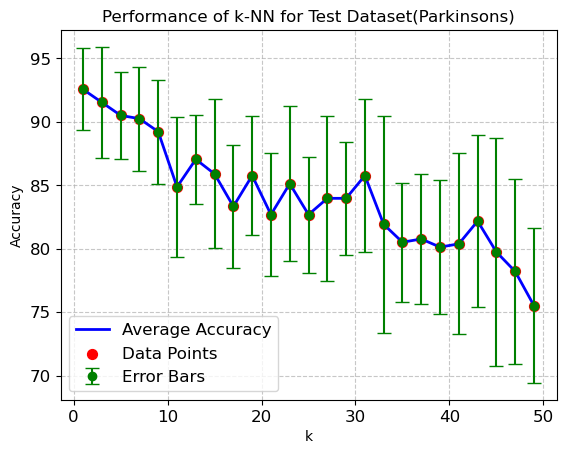

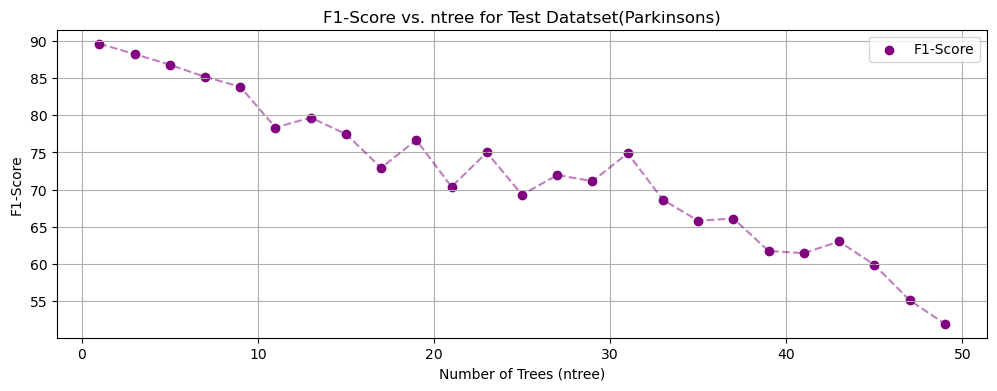

In [53]:
# Graph 1: TRAIN DATASET

k_range = range(1, 51, 2)
avg_accuracy_test= []
std_accuracy_test = []
avg_f1_score_test = []
for k in k_range:
    accuracies_test = []
    f1score_test = []
    # Repeat the process 20 times
    for i in range(20):
        data_shuffled = utils.shuffle(parkinsons_dataset)
        X =  data_shuffled.drop(["Diagnosis"],axis = 1)
        Y = data_shuffled["Diagnosis"]
        X_training_set, X_test_set, Y_training_set, Y_test_set = partition(X, Y)
        X_training_set = normalize(X_training_set)
        X_test_set = normalize(X_test_set)

        
        accuracy_training, f1  = compute_accuracy_knn_test(X_training_set, X_test_set, Y_training_set, Y_test_set, k)
        accuracies_test.append(accuracy_training)
        f1score_test.append(f1)
    print("k = ", k, "   Average Accuracy: ", np.mean(accuracies_test), "   Average F1-Score: ", np.mean(f1score_test))
    std_accuracy_test.append(np.std(accuracies_test))
    avg_accuracy_test.append(np.mean(accuracies_test))
    avg_f1_score_test.append(np.mean(f1score_test))




# Create a figure and axis object
fig, ax = plt.subplots()
# Plot points and lines
ax.plot(k_range, avg_accuracy_test, color='blue', linewidth=2, label='Average Accuracy')
ax.scatter(k_range, avg_accuracy_test, color='red', marker='o', s=50, label='Data Points')

# PROBLEM 1.2 
# Error bars
plt.errorbar(k_range, avg_accuracy_test, yerr=std_accuracy_test, fmt='o', color='green', capsize=5, label='Error Bars')

# Legend
plt.legend(fontsize=12)

# Grid
plt.grid(True, linestyle='--', alpha=0.7)
ax.set(xlabel="k", ylabel="Accuracy", title="Performance of k-NN for Test Dataset(Parkinsons)")
ax.tick_params(axis='both', which='major', labelsize=12)


plt.show()

plt.figure(figsize=(12, 4))
plt.scatter(k_range, avg_f1_score_test, color='purple', label='F1-Score')
plt.plot(k_range, avg_f1_score_test, color='purple', linestyle='--', alpha=0.5)
plt.xlabel('Number of Trees (ntree)')
plt.ylabel('F1-Score')
plt.title(f'F1-Score vs. ntree for Test Datatset(Parkinsons)')
plt.legend()
plt.grid(True)
plt.show()


k =  1    Average Accuracy:  100.0    Average F1-Score:  100.0
k =  3    Average Accuracy:  97.43589743589743    Average F1-Score:  96.63226515266794
k =  5    Average Accuracy:  95.83333333333334    Average F1-Score:  94.1990304062779
k =  7    Average Accuracy:  94.4551282051282    Average F1-Score:  92.16074949285607
k =  9    Average Accuracy:  92.1794871794872    Average F1-Score:  88.43888826938687
k =  11    Average Accuracy:  90.48076923076923    Average F1-Score:  85.563627486178
k =  13    Average Accuracy:  89.07051282051282    Average F1-Score:  83.45324704133085
k =  15    Average Accuracy:  87.11538461538461    Average F1-Score:  79.16899614795918
k =  17    Average Accuracy:  84.67948717948715    Average F1-Score:  73.6179205181845
k =  19    Average Accuracy:  84.23076923076921    Average F1-Score:  72.88395645596809
k =  21    Average Accuracy:  83.17307692307692    Average F1-Score:  69.92888553810118
k =  23    Average Accuracy:  83.2051282051282    Average F1-Score:

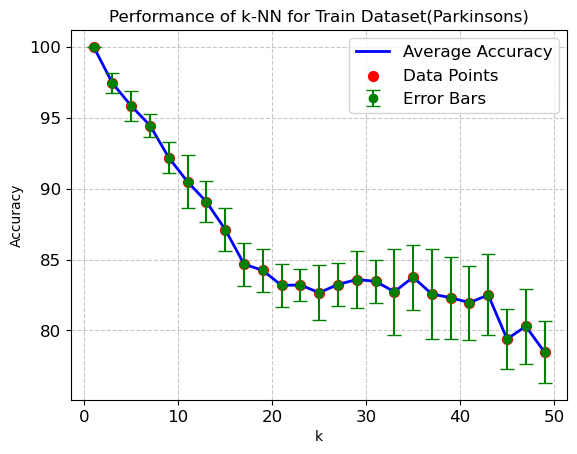

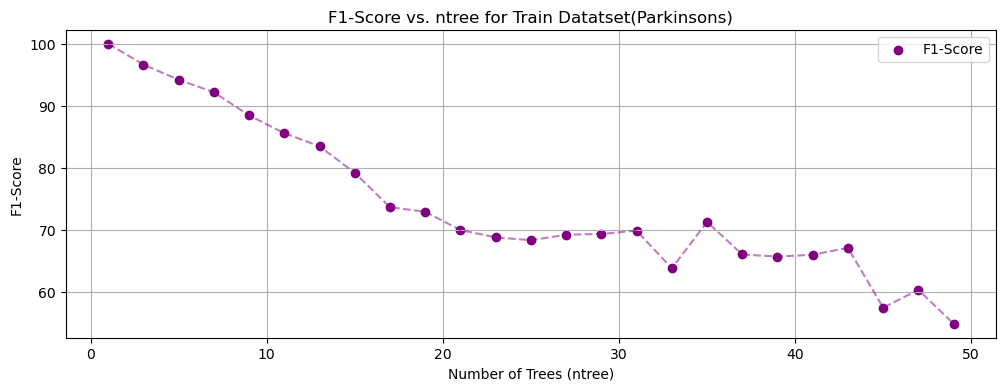

In [57]:
# Graph 1: TRAIN DATASET

k_range = range(1, 51, 2)
avg_accuracy_test= []
std_accuracy_test = []
avg_f1_score_test = []
for k in k_range:
    accuracies_test = []
    f1score_test = []
    # Repeat the process 20 times
    for i in range(20):
        data_shuffled = utils.shuffle(parkinsons_dataset)
        X =  data_shuffled.drop(["Diagnosis"],axis = 1)
        Y = data_shuffled["Diagnosis"]
        X_training_set, X_test_set, Y_training_set, Y_test_set = partition(X, Y)
        X_training_set = normalize(X_training_set)
        X_test_set = normalize(X_test_set)

        
        accuracy_training, f1  = compute_accuracy_knn_train(X_training_set, Y_training_set, k)
        accuracies_test.append(accuracy_training)
        f1score_test.append(f1)
    print("k = ", k, "   Average Accuracy: ", np.mean(accuracies_test), "   Average F1-Score: ", np.mean(f1score_test))
    std_accuracy_test.append(np.std(accuracies_test))
    avg_accuracy_test.append(np.mean(accuracies_test))
    avg_f1_score_test.append(np.mean(f1score_test))




# Create a figure and axis object
fig, ax = plt.subplots()
# Plot points and lines
ax.plot(k_range, avg_accuracy_test, color='blue', linewidth=2, label='Average Accuracy')
ax.scatter(k_range, avg_accuracy_test, color='red', marker='o', s=50, label='Data Points')

# PROBLEM 1.2 
# Error bars
plt.errorbar(k_range, avg_accuracy_test, yerr=std_accuracy_test, fmt='o', color='green', capsize=5, label='Error Bars')

# Legend
plt.legend(fontsize=12)

# Grid
plt.grid(True, linestyle='--', alpha=0.7)
ax.set(xlabel="k", ylabel="Accuracy", title="Performance of k-NN for Train Dataset(Parkinsons)")
ax.tick_params(axis='both', which='major', labelsize=12)


plt.show()

plt.figure(figsize=(12, 4))
plt.scatter(k_range, avg_f1_score_test, color='purple', label='F1-Score')
plt.plot(k_range, avg_f1_score_test, color='purple', linestyle='--', alpha=0.5)
plt.xlabel('Number of Trees (ntree)')
plt.ylabel('F1-Score')
plt.title(f'F1-Score vs. ntree for Train Datatset(Parkinsons)')
plt.legend()
plt.grid(True)
plt.show()


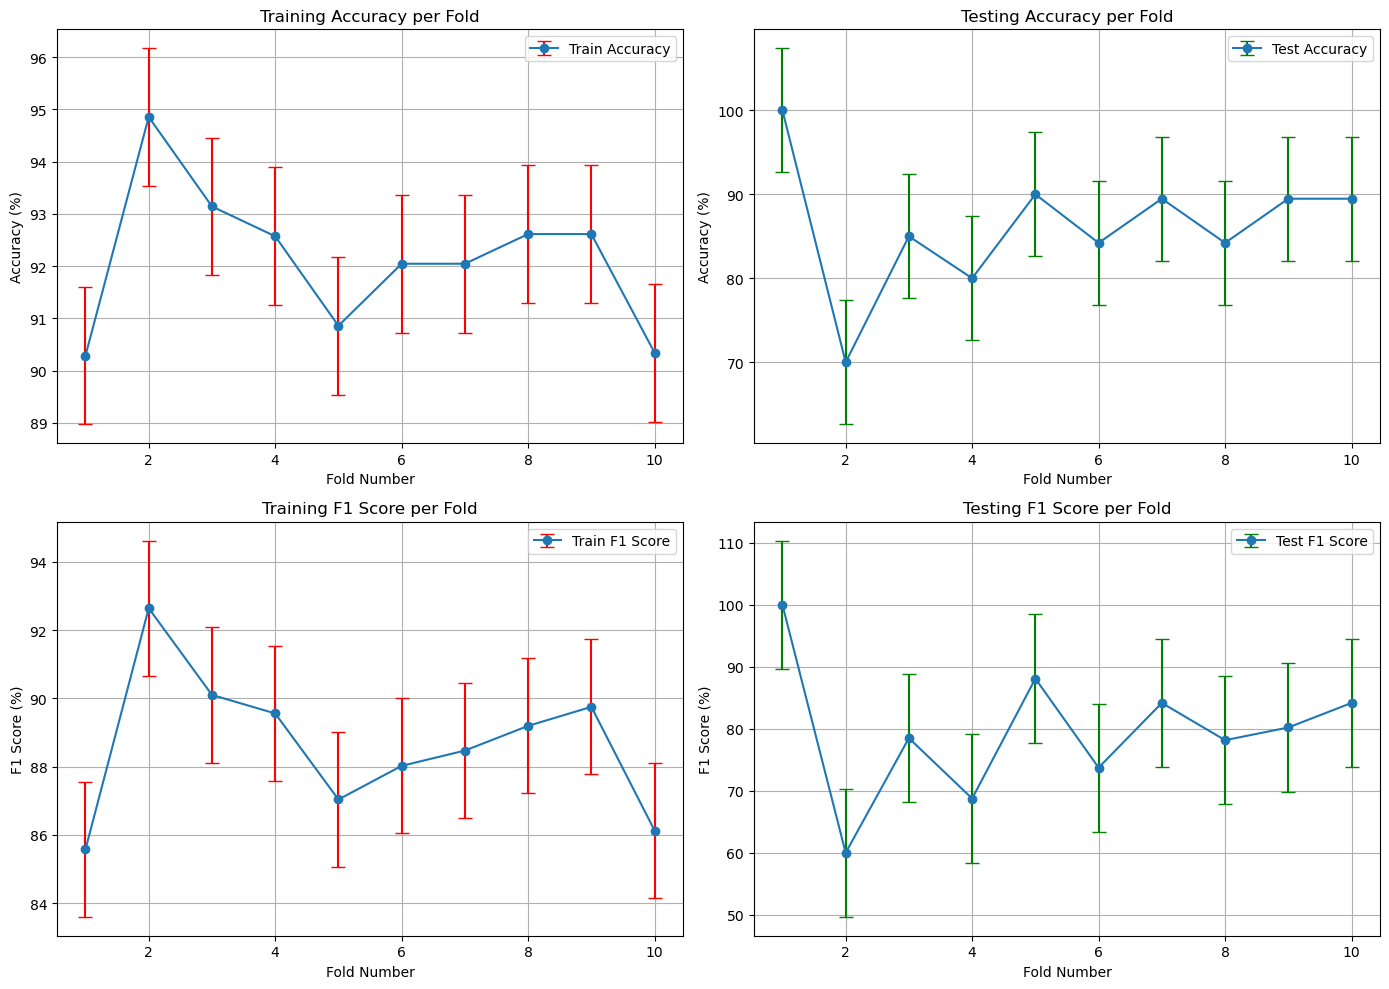

In [137]:
def stratified_kfold(X, Y, num_folds):
    # Combine X and y to shuffle them together
    data = pd.concat([X, Y], axis=1)

    # Sort data by the target variable to facilitate stratification
    data.sort_values(by=Y.name, inplace=True)
    # print("got here 1 ")
    
    # Divide the sorted data into num_folds segments
    folds = [data.iloc[i::num_folds] for i in range(num_folds)]
    # print("got here 2")
    stratified_folds = []
    
    # Generate stratified folds
    for i in range(num_folds):
        test_fold = folds[i]
        # print("got here 3")
        train_folds = pd.concat([folds[j] for j in range(num_folds) if j != i])
        # print("got here 4")
        
        stratified_folds.append((train_folds.drop(columns=[Y.name]), test_fold.drop(columns=[Y.name]), train_folds[Y.name], test_fold[Y.name]))
    
    return stratified_folds

k_11= {'train_acc': [], 'test_acc': [], 'train_f1': [], 'test_f1': []}
k = 11
data_shuffled = utils.shuffle(parkinsons_dataset)
X1=  data_shuffled.drop(["Diagnosis"],axis = 1)
y1 = data_shuffled["Diagnosis"]

folds = stratified_kfold(X1, y1, 10)

for features_train, features_test, labels_train,  labels_test in folds:
    features_train = normalize(features_train)
    features_test = normalize(features_test)

    training_accuracy,training_f1 = compute_accuracy_knn_train(features_train, labels_train, k)
    testing_accuracy, testing_f1 = compute_accuracy_knn_test(features_train, features_test, labels_train,  labels_test, k)
    k_11['train_acc'].append(training_accuracy)
    k_11['test_acc'].append(testing_accuracy)
    k_11['train_f1'].append(training_f1)
    k_11['test_f1'].append(testing_f1)

folds = list(range(1, len(k_11['train_acc']) + 1))
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
error_color_train = 'red'
error_color_test = 'green'
axes[0, 0].errorbar(folds, k_11['train_acc'], yerr=np.std(k_11['train_acc']),label='Train Accuracy', fmt='-o', capsize=5, ecolor=error_color_train)
axes[0, 0].set_title('Training Accuracy per Fold')
axes[0, 0].set_xlabel('Fold Number')
axes[0, 0].set_ylabel('Accuracy (%)')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 1].errorbar(folds, k_11['test_acc'], yerr=np.std(k_11['test_acc']),label='Test Accuracy', fmt='-o', capsize=5, ecolor=error_color_test)
axes[0, 1].set_title('Testing Accuracy per Fold')
axes[0, 1].set_xlabel('Fold Number')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[1, 0].errorbar(folds, k_11['train_f1'], yerr=np.std(k_11['train_f1']),label='Train F1 Score', fmt='-o', capsize=5, ecolor=error_color_train)
axes[1, 0].set_title('Training F1 Score per Fold')
axes[1, 0].set_xlabel('Fold Number')
axes[1, 0].set_ylabel('F1 Score (%)')

axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 1].errorbar(folds, k_11['test_f1'], yerr=np.std(k_11['test_f1']),label='Test F1 Score', fmt='-o', capsize=5, ecolor=error_color_test)
axes[1, 1].set_title('Testing F1 Score per Fold')
axes[1, 1].set_xlabel('Fold Number')
axes[1, 1].set_ylabel('F1 Score (%)')
axes[1, 1].legend()
axes[1, 1].grid(True)
plt.tight_layout()
plt.show()